In [4]:
import csv
from langdetect import detect
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import gensim
from gensim.models import Word2Vec
import pandas as pd

C:\Users\user\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
df=pd.read_csv('coursera_data.csv')

In [6]:
df

,Course Name,Company Offering,Skills Gained,Ratings,Number of Ratings
0,Google Data Analytics,Google,"Data Analysis, R Programming, SQL, Business Co...",4.8,141000
1,Google Cybersecurity,Google,"Network Security, Python Programming, Linux, C...",4.8,26000
2,Google Project Management:,Google,"Project Management, Strategy and Operations, L...",4.8,104000
3,IBM Data Science,IBM,"Python Programming, Machine Learning, Data Sci...",4.6,123000
4,Google Digital Marketing & E-commerce,Google,"Digital Marketing, Marketing, Marketing Manage...",4.8,25000
...,...,...,...,...,...
879,First Order Optical System Design,University of Colorado Boulder,Systems Design,4.3,304
880,Excel Fundamentals for Data Analysis,Macquarie University,"Business Analysis, Spreadsheet Software, Data ...",4.8,6000
881,Introduction to Portfolio Construction and Ana...,EDHEC Business School,"Computer Programming, Finance, Investment Mana...",4.8,4000
882,Teach English Now! Capstone Project 1,Arizona State University,Planning,4.9,2000


In [7]:
df.isnull().sum()

Course Name          0
Company Offering     0
Skills Gained        0
Ratings              0
Number of Ratings    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884 entries, 0 to 883
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Course Name        884 non-null    object 
 1   Company Offering   884 non-null    object 
 2   Skills Gained      884 non-null    object 
 3   Ratings            884 non-null    float64
 4   Number of Ratings  884 non-null    int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 34.7+ KB


In [4]:
# remove the non english words from the data

def filter_english_instances(df, column_name='Course Name', primary_language='en'):
    for index, row in df.iterrows():
        instance = row[column_name]
        try:
            detected_language = detect(instance)
            if detected_language != primary_language:
                df = df.drop(index)
        except:
            pass
    return df

In [5]:
df

,Course Name,Company Offering,Skills Gained,Ratings,Number of Ratings
0,Google Data Analytics,Google,"Data Analysis, R Programming, SQL, Business Co...",4.8,141000
1,Google Cybersecurity,Google,"Network Security, Python Programming, Linux, C...",4.8,26000
2,Google Project Management:,Google,"Project Management, Strategy and Operations, L...",4.8,104000
3,IBM Data Science,IBM,"Python Programming, Machine Learning, Data Sci...",4.6,123000
4,Google Digital Marketing & E-commerce,Google,"Digital Marketing, Marketing, Marketing Manage...",4.8,25000
...,...,...,...,...,...
995,Precision Medicine,University of Geneva,NaN,4.4,251
996,BIM Fundamentals for Engineers,National Taiwan University,NaN,4.7,6000
997,Teach English Now! Capstone Project 1,Arizona State University,Planning,4.9,2000
998,Autodesk CAD/CAM for Manufacturing,Autodesk,"Design and Product, Geometry, Product Design, ...",4.8,965


In [7]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('coursera_data.csv')

# Remove rows where the rating is zero
df = df[df['Number of Ratings'] != 0]

# Save the modified DataFrame back to a CSV file
df.to_csv('coursera_data.csv', index=False)


In [8]:
df

,Course Name,Company Offering,Skills Gained,Ratings,Number of Ratings
0,Google Data Analytics,Google,"Data Analysis, R Programming, SQL, Business Co...",4.8,141000
1,Google Cybersecurity,Google,"Network Security, Python Programming, Linux, C...",4.8,26000
2,Google Project Management:,Google,"Project Management, Strategy and Operations, L...",4.8,104000
3,IBM Data Science,IBM,"Python Programming, Machine Learning, Data Sci...",4.6,123000
4,Google Digital Marketing & E-commerce,Google,"Digital Marketing, Marketing, Marketing Manage...",4.8,25000
...,...,...,...,...,...
995,Precision Medicine,University of Geneva,NaN,4.4,251
996,BIM Fundamentals for Engineers,National Taiwan University,NaN,4.7,6000
997,Teach English Now! Capstone Project 1,Arizona State University,Planning,4.9,2000
998,Autodesk CAD/CAM for Manufacturing,Autodesk,"Design and Product, Geometry, Product Design, ...",4.8,965


In [10]:
# Load the data
df = pd.read_csv('coursera_data.csv')

# Remove rows where the "Skills Gained" column is blank
df = df.dropna(subset=['Skills Gained'])

# Save the modified DataFrame back to the same CSV file
df.to_csv('coursera_data.csv', index=False)


In [11]:
df

,Course Name,Company Offering,Skills Gained,Ratings,Number of Ratings
0,Google Data Analytics,Google,"Data Analysis, R Programming, SQL, Business Co...",4.8,141000
1,Google Cybersecurity,Google,"Network Security, Python Programming, Linux, C...",4.8,26000
2,Google Project Management:,Google,"Project Management, Strategy and Operations, L...",4.8,104000
3,IBM Data Science,IBM,"Python Programming, Machine Learning, Data Sci...",4.6,123000
4,Google Digital Marketing & E-commerce,Google,"Digital Marketing, Marketing, Marketing Manage...",4.8,25000
...,...,...,...,...,...
984,First Order Optical System Design,University of Colorado Boulder,Systems Design,4.3,304
985,Excel Fundamentals for Data Analysis,Macquarie University,"Business Analysis, Spreadsheet Software, Data ...",4.8,6000
986,Introduction to Portfolio Construction and Ana...,EDHEC Business School,"Computer Programming, Finance, Investment Mana...",4.8,4000
989,Teach English Now! Capstone Project 1,Arizona State University,Planning,4.9,2000


                             Course Name Company Offering  \
0                  Google Data Analytics           Google   
1                   Google Cybersecurity           Google   
2             Google Project Management:           Google   
3                       IBM Data Science              IBM   
4  Google Digital Marketing & E-commerce           Google   

                                       Skills Gained  Ratings  \
0  Data Analysis, R Programming, SQL, Business Co...      4.8   
1  Network Security, Python Programming, Linux, C...      4.8   
2  Project Management, Strategy and Operations, L...      4.8   
3  Python Programming, Machine Learning, Data Sci...      4.6   
4  Digital Marketing, Marketing, Marketing Manage...      4.8   

   Number of Ratings  
0             141000  
1              26000  
2             104000  
3             123000  
4              25000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 5 columns):


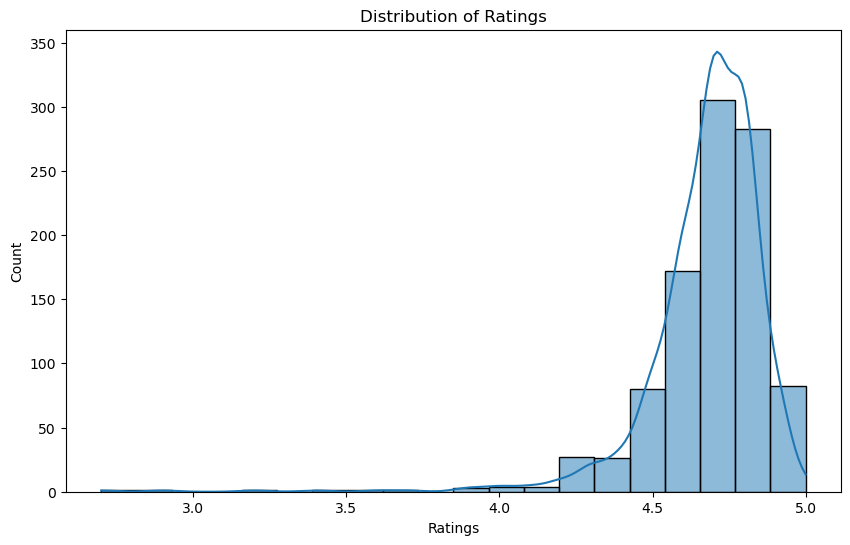

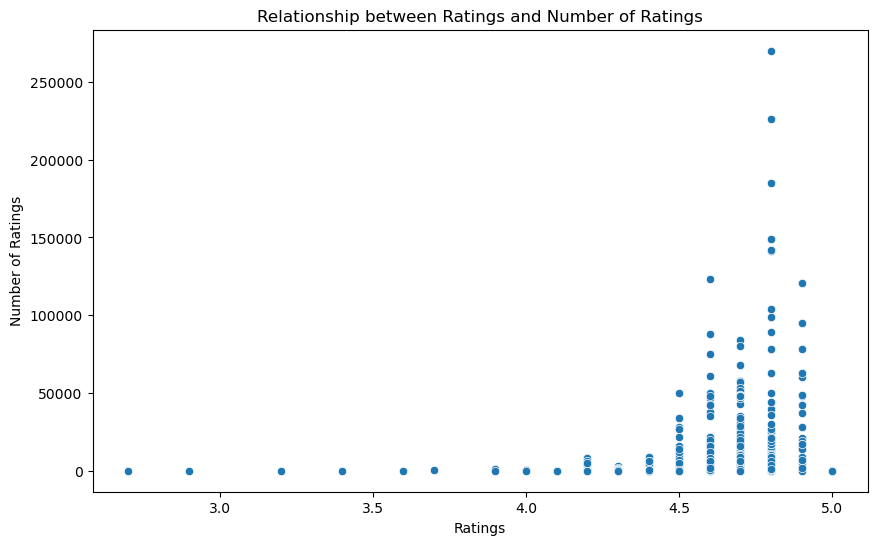

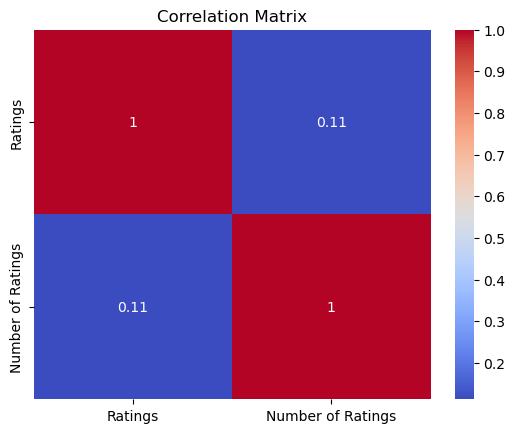

Leadership and Management    331
Data Analysis                254
Computer Programming         204
Communication                200
Strategy                     176
                            ... 
Geostatistics                  1
Underwriting                   1
HR Tech                        1
Jira (Software)                1
Business                       1
Length: 337, dtype: int64
IBM                                     100
Google                                   90
University of Pennsylvania               54
DeepLearning.AI                          40
University of Michigan                   34
                                       ... 
The Museum of Modern Art                  1
UiPath                                    1
University of Amsterdam                   1
Scrimba                                   1
Technical University of Munich (TUM)      1
Name: Company Offering, Length: 157, dtype: int64


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('coursera_data.csv')

# Data exploration
print(df.head())
print(df.info())
print(df.describe())

# Data visualization
plt.figure(figsize=(10, 6))
sns.histplot(df['Ratings'], bins=20, kde=True)
plt.xlabel('Ratings')
plt.title('Distribution of Ratings')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Ratings', y='Number of Ratings', data=df)
plt.title('Relationship between Ratings and Number of Ratings')
plt.show()

# Correlation analysis
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Skill analysis
skills = df['Skills Gained'].str.split(', ', expand=True).stack().value_counts()
print(skills)

# Company offering analysis
company_distribution = df['Company Offering'].value_counts()
print(company_distribution)

# Conclusion
# Summarize your findings and insights


In [12]:


# Distribution of courses offered by different companies
company_distribution = df['Company Offering'].value_counts()
print(company_distribution)

IBM                                            95
Google                                         89
University of Pennsylvania                     50
DeepLearning.AI                                40
Google Cloud                                   32
                                               ..
University of Cape Town                         1
Goodwill Industries International               1
Nanyang Technological University, Singapore     1
Indian School of Business                       1
Instituto TecnolÃ³gico de AeronÃ¡utica          1
Name: Company Offering, Length: 141, dtype: int64


In [13]:
# Extracting skills gained
skills = df['Skills Gained'].str.split(', ', expand=True).stack().value_counts()
print(skills)

Leadership and Management    331
Data Analysis                254
Computer Programming         204
Communication                200
Strategy                     176
                            ... 
Geostatistics                  1
Underwriting                   1
HR Tech                        1
Jira (Software)                1
Business                       1
Length: 337, dtype: int64


In [13]:
import pandas as pd

# Load the data
df = pd.read_csv('coursera_data.csv')

# Splitting skills gained into individual skills and stacking them
skills_df = df['Skills Gained'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).rename('Skill')

# Concatenating skills with original dataframe
df = df.join(skills_df)

# Count occurrences of each skill for each company
company_skill_counts = df.groupby(['Company Offering', 'Skill']).size().reset_index(name='Count')

# Find top 5 skills gained for each company
top_skills_by_company = company_skill_counts.groupby('Company Offering').apply(lambda x: x.nlargest(5, 'Count'))

# Aggregate counts for each skill across all companies
overall_top_skills = top_skills_by_company.groupby('Skill')['Count'].sum().nlargest(5)

print("Top 5 skills gained overall (skill and count of companies):")
print(overall_top_skills)


Top 5 skills gained overall (skill and count of companies):
Skill
Leadership and Management    236
Data Analysis                163
Computer Programming         134
Communication                105
Critical Thinking             93
Name: Count, dtype: int64


In [28]:
import pandas as pd

# Load the data
df = pd.read_csv('coursera_data.csv')

# Filter courses with ratings greater than 4 and number of ratings greater than 1000
filtered_df = df[(df['Ratings'] > 4.5) & (df['Number of Ratings'] > 100000)]

# Analyze the course names in the filtered DataFrame
course_names = filtered_df['Course Name'].unique()

# Output the analysis
print("Courses with ratings greater than 4.5 and number of ratings greater than 100000:")
for course in course_names:
    print(course)


Courses with ratings greater than 4.5 and number of ratings greater than 100000:
Google Data Analytics
Google Project Management:
IBM Data Science
Google IT Support
Deep Learning
Python for Everybody
Technical Support Fundamentals
Neural Networks and Deep Learning
Programming for Everybody (Getting Started with Python)


In [26]:
#company name with their top skill which is offered from different  courses

import pandas as pd

# Load the data
df = pd.read_csv('coursera_data.csv')

# Splitting skills gained into individual skills and stacking them
skills_df = df['Skills Gained'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).rename('Skill')

# Concatenating skills with the original dataframe
df = df.join(skills_df)

# Count occurrences of each skill for each company
company_skill_counts = df.groupby(['Company Offering', 'Skill']).size().reset_index(name='Count')

# Filter out skill counts less than or equal to 25
company_skill_counts_filtered = company_skill_counts[company_skill_counts['Count'] > 25]

# Create an empty dictionary to store the results
top_skill_by_company = {}

# Iterate over each unique company
for company in company_skill_counts_filtered['Company Offering'].unique():
    # Filter the DataFrame for the current company
    company_df = company_skill_counts_filtered[company_skill_counts_filtered['Company Offering'] == company]
    
    # Find the top skill for the current company
    top_skill = company_df.loc[company_df['Count'].idxmax()]
    
    # Store the top skill and its count in the dictionary
    top_skill_by_company[company] = (top_skill['Skill'], top_skill['Count'])

# Output the result for each company
for company, (top_skill, count) in top_skill_by_company.items():
    print(f"The company '{company}' offered the top skill '{top_skill}' with a count of {count}.")


The company 'DeepLearning.AI' offered the top skill 'Machine Learning' with a count of 36.
The company 'Google' offered the top skill 'Data Analysis' with a count of 32.
The company 'Google Cloud' offered the top skill 'Google Cloud Platform' with a count of 30.
The company 'IBM' offered the top skill 'Computer Programming' with a count of 48.


Unique skills with count greater than 100:
Leadership and Management: 331
Data Analysis: 254
Computer Programming: 204
Communication: 200
Strategy: 176
Critical Thinking: 167
Problem Solving: 159
Strategy and Operations: 156
Python Programming: 151
Machine Learning: 136
Business Analysis: 125
Planning: 121
Algorithms: 115
Cloud Computing: 109
Data Management: 108
Finance: 101


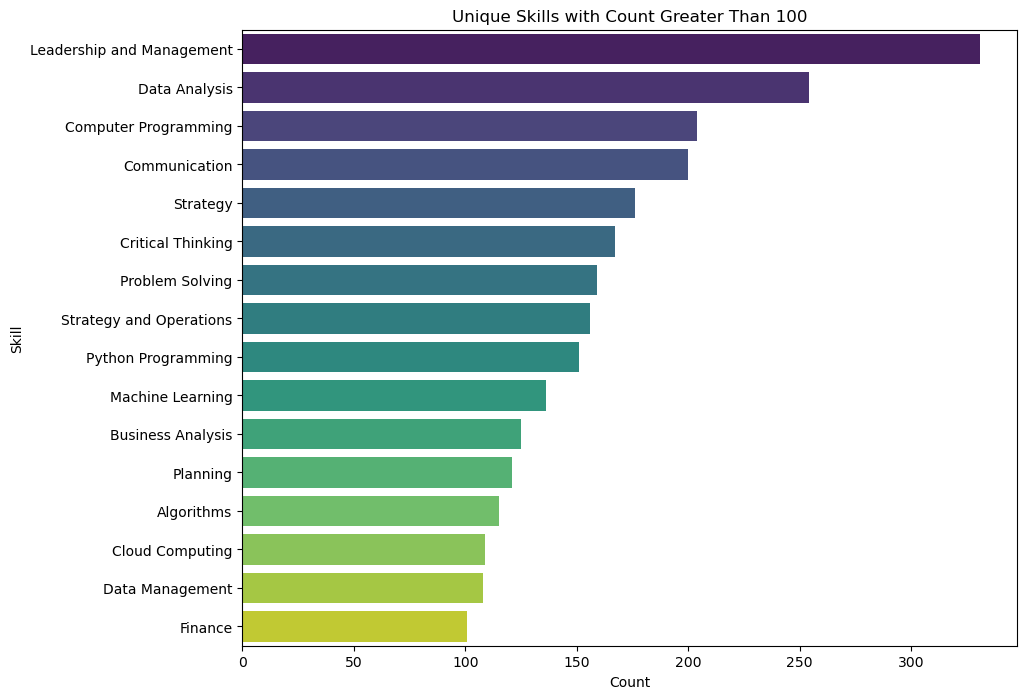

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('coursera_data.csv')

# Splitting skills gained into individual skills and stacking them
skills_df = df['Skills Gained'].str.split(', ', expand=True).stack().reset_index(drop=True)

# Count occurrences of each skill
skill_counts = skills_df.value_counts()

# Filter skills with count greater than 25
filtered_skills = skill_counts[skill_counts > 100]

# Output the filtered unique skills
print("Unique skills with count greater than 100:")
for skill, count in filtered_skills.items():
    print(f"{skill}: {count}")

# Create horizontal bar graph with stylish coloring
plt.figure(figsize=(10, 8))
sns.barplot(x=filtered_skills.values, y=filtered_skills.index, palette='viridis')
plt.title('Unique Skills with Count Greater Than 100')
plt.xlabel('Count')
plt.ylabel('Skill')
plt.show()

In [17]:
import pandas as pd

# Load the data
df = pd.read_csv('coursera_data.csv')

# Filter data for Google company
google_data = df[df['Company Offering'] == 'Google']

# Define the skills to be counted
google_skills = ['Leadership and Management', 'Data Analysis', 'Computer Programming']

# Filter Google's skills
google_data_filtered = google_data[google_data['Skills Gained'].str.contains('|'.join(google_skills))]

# Count occurrences of each skill
skill_counts = google_data_filtered['Skills Gained'].str.split(', ').explode().value_counts()

# Print the counts for each skill
print("Counts of skills offered by Google:")
for skill in google_skills:
    count = skill_counts.get(skill, 0)
    print(f"{skill}: {count}")


Counts of skills offered by Google:
Leadership and Management: 31
Data Analysis: 32
Computer Programming: 20


In [18]:

df = pd.read_csv('coursera_data.csv')

# Filter data for IBM company
ibm_data = df[df['Company Offering'] == 'IBM']

# Define the skills to be counted
ibm_skills = ['Leadership and Management', 'Data Analysis', 'Computer Programming']

# Filter IBM's skills
ibm_data_filtered = ibm_data[ibm_data['Skills Gained'].str.contains('|'.join(ibm_skills))]

# Count occurrences of each skill
skill_counts = ibm_data_filtered['Skills Gained'].str.split(', ').explode().value_counts()

# Print the counts for each skill
print("Counts of skills offered by IBM:")
for skill in ibm_skills:
    count = skill_counts.get(skill, 0)
    print(f"{skill}: {count}")


Counts of skills offered by IBM:
Leadership and Management: 28
Data Analysis: 44
Computer Programming: 48


In [19]:
import pandas as pd

# Load the data
df = pd.read_csv('coursera_data.csv')

# Filter data for University of Pennsylvania
upenn_data = df[df['Company Offering'] == 'University of Pennsylvania']

# Define the skills to be counted
upenn_skills = ['Leadership and Management', 'Data Analysis', 'Computer Programming']

# Filter University of Pennsylvania's skills
upenn_data_filtered = upenn_data[upenn_data['Skills Gained'].str.contains('|'.join(upenn_skills))]

# Count occurrences of each skill
skill_counts = upenn_data_filtered['Skills Gained'].str.split(', ').explode().value_counts()

# Print the counts for each skill
print("Counts of skills offered by University of Pennsylvania:")
for skill in upenn_skills:
    count = skill_counts.get(skill, 0)
    print(f"{skill}: {count}")


Counts of skills offered by University of Pennsylvania:
Leadership and Management: 22
Data Analysis: 15
Computer Programming: 7


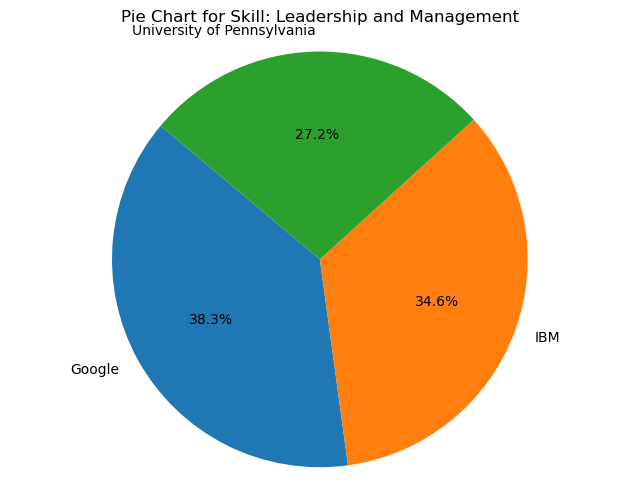

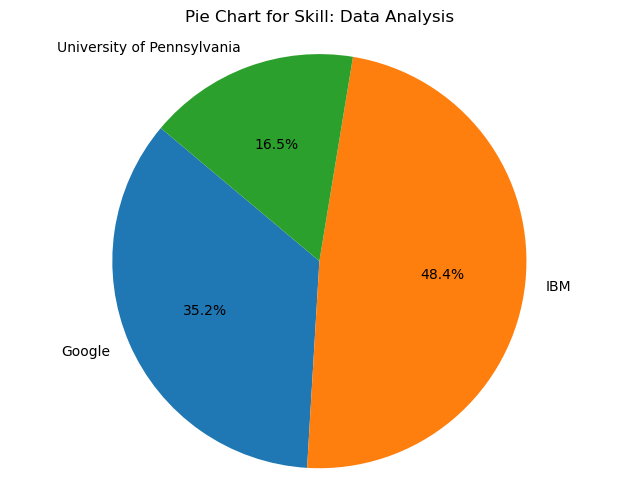

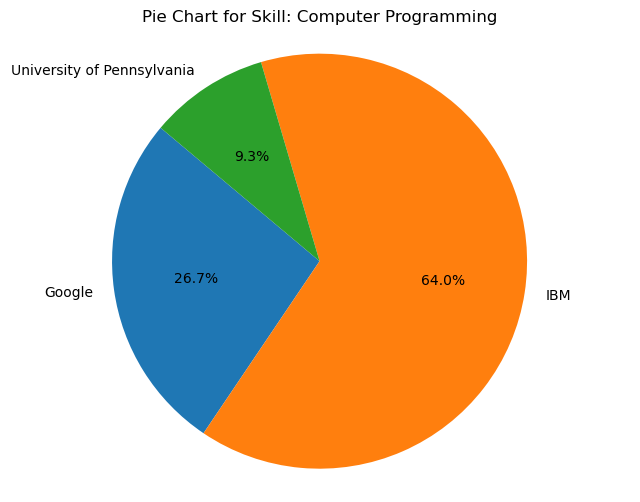

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Data
data = {
    'Company Name': ['Google', 'Google', 'Google', 'IBM', 'IBM', 'IBM','University of Pennsylvania','University of Pennsylvania','University of Pennsylvania'],
    'Skill': ['Leadership and Management', 'Data Analysis', 'Computer Programming', 
              'Leadership and Management', 'Data Analysis', 'Computer Programming',
              'Leadership and Management', 'Data Analysis', 'Computer Programming'],
    'Count': [31,32,20,28,44,48,22,15,7]
}

# Create DataFrame
df = pd.DataFrame(data)

# Unique skills with count greater than 100
filtered_skills = {
    'Leadership and Management': 331,
    'Data Analysis': 254,
    'Computer Programming': 204
}

# Plot pie chart for each skill
for skill, count in filtered_skills.items():
    # Filter data for the skill
    skill_data = df[df['Skill'] == skill]
    
    # Group data by company name and sum count
    skill_data_grouped = skill_data.groupby('Company Name')['Count'].sum()
    
    # Plot pie chart
    plt.figure(figsize=(8, 6))
    plt.pie(skill_data_grouped, labels=skill_data_grouped.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Pie Chart for Skill: {skill}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()


Top 5 Companies with the Highest Count of Ratings (Ratings > 4.75):
Company: Google, Count of Ratings: 65
Company: University of Pennsylvania, Count of Ratings: 17
Company: DeepLearning.AI, Count of Ratings: 17
Company: IBM, Count of Ratings: 14
Company: University of Michigan, Count of Ratings: 12


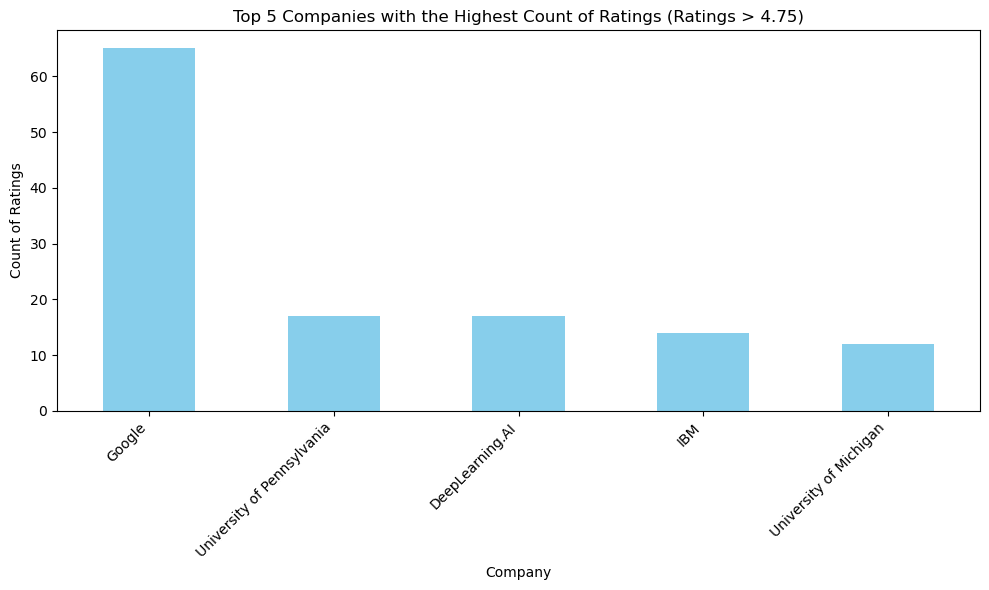

In [27]:

df = pd.read_csv('coursera_data.csv')

# Filter data for ratings greater than 4.75
high_rating_data = df[df['Ratings'] > 4.75]

# Group by company name and count ratings
company_rating_counts = high_rating_data.groupby('Company Offering')['Number of Ratings'].count()

# Sort companies by count of ratings and select top 5
top_companies = company_rating_counts.sort_values(ascending=False).head(5)

# Print top 5 companies and their count of ratings
print("Top 5 Companies with the Highest Count of Ratings (Ratings > 4.75):")
for company, count in top_companies.items():
    print(f"Company: {company}, Count of Ratings: {count}")

    
# Create bar graph
plt.figure(figsize=(10, 6))
top_companies.plot(kind='bar', color='skyblue')
plt.title('Top 5 Companies with the Highest Count of Ratings (Ratings > 4.75)')
plt.xlabel('Company')
plt.ylabel('Count of Ratings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Top 5 skills offered by Google with ratings greater than 4.75 according to their count:
Communication                22
Leadership and Management    19
Data Analysis                17
SQL                          16
Computer Programming         15
Name: Skills Gained, dtype: int64


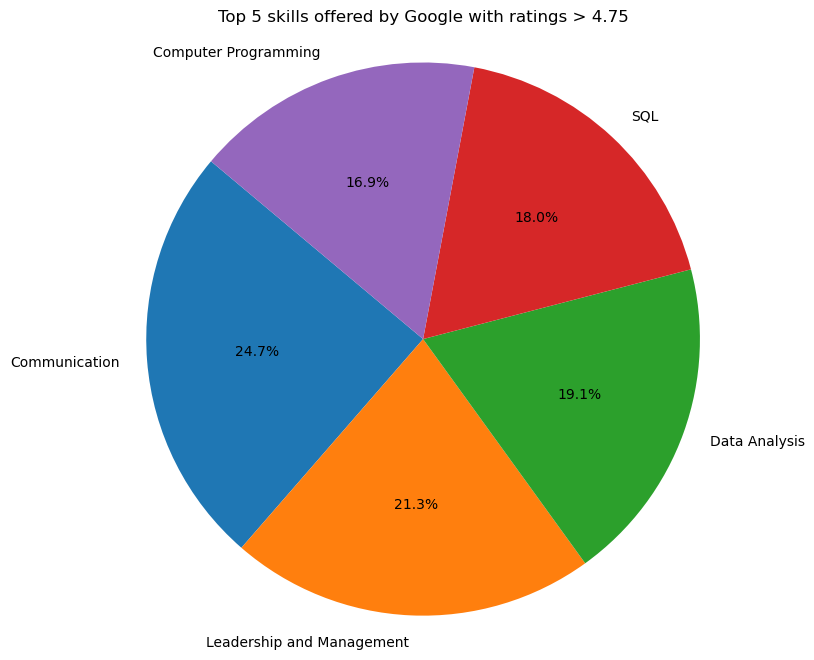

In [28]:

df = pd.read_csv('coursera_data.csv')

# Filter data for Google company
google_data = df[df['Company Offering'] == 'Google']

# Filter Google's data for ratings greater than 4.75
google_high_rating_data = google_data[google_data['Ratings'] > 4.75]

# Extract all skills offered by Google with high ratings
google_skills_high_rating = google_high_rating_data['Skills Gained'].str.split(', ').explode()

# Count occurrences of each skill
skill_counts = google_skills_high_rating.value_counts()

# Get the top 5 skills
top_skills = skill_counts.head(5)

# Print the top 5 skills
print("Top 5 skills offered by Google with ratings greater than 4.75 according to their count:")
print(top_skills)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_skills, labels=top_skills.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 skills offered by Google with ratings > 4.75')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()